<a href="https://colab.research.google.com/github/Sabirbinsakander/-data-science/blob/main/Timing_Series_forcasting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/Rubaiya-Razin/Data-Science-Course/refs/heads/main/data-dhaka-weather1953-2016.csv'
df = pd.read_csv(url)

In [3]:
df.head(

)

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
0,1953,1,26.7,10.9,70,10.0
1,1953,2,33.6,14.7,65,2.0
2,1953,3,37.5,21.7,73,90.0
3,1953,4,37.7,23.4,69,90.0
4,1953,5,34.7,24.2,81,274.0


In [5]:
df ['ds'] = pd.to_datetime(df['YEAR'].astype(str) + '-'+ df['Month'].astype(str) + '-01')
df ['y'] = df['MaxTemp']

In [6]:
model = Prophet()
model.fit(df[['ds', 'y']])

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = model.make_future_dataframe(periods=12, freq='M')

forecast = model.predict(future)

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


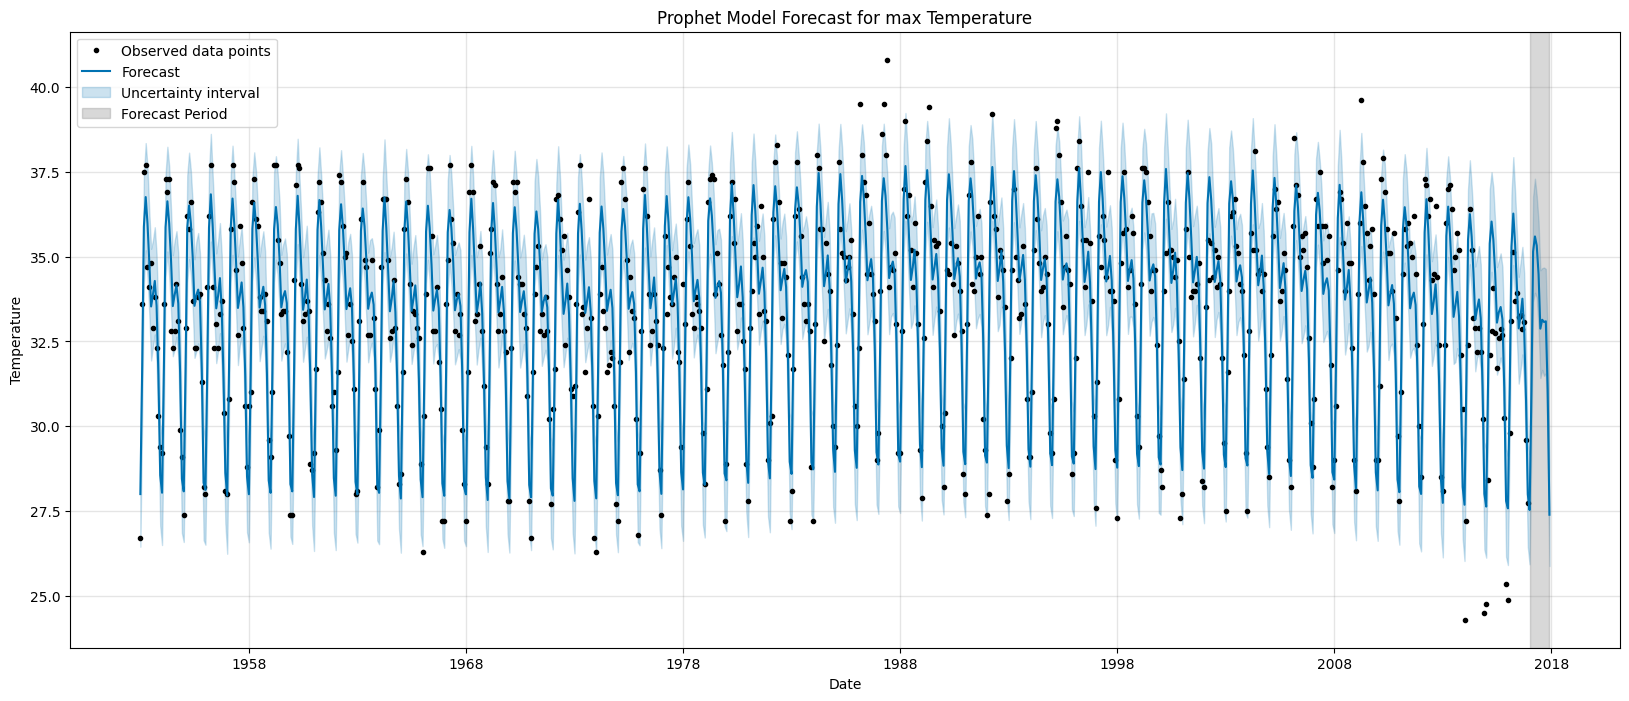

In [8]:
fig, ax = plt.subplots(figsize=(20, 8))
model.plot(forecast, ax=ax)

forecast_start = forecast['ds'].iloc[len(df)]
forecast_end = forecast['ds'].iloc[-1]

ax.axvspan(forecast_start, forecast_end, color='grey', alpha=0.3, label='Forecast Period')


ax.set_title('Prophet Model Forecast for max Temperature')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
ax.legend()
plt.show()